In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/final_with_scores.csv", encoding = "ISO-8859-1")
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,scores
2019,4/9/2021,14882.65039,14918.45020,14785.65039,14834.84961,14834.84961,504100.0,0.280429
2020,4/12/2021,14644.65039,14652.50000,14248.70020,14310.79981,14310.79981,650200.0,0.134625
2021,4/13/2021,14364.90039,14528.90039,14274.90039,14504.79981,14504.79981,605100.0,0.248233
2022,4/15/2021,14522.40039,14597.54981,14353.20020,14581.45020,14581.45020,568000.0,0.170275
2023,4/16/2021,14599.59961,14697.70020,14559.00000,14621.75000,14621.75000,0.0,0.210400


In [ ]:
df[:17]

,Date,Open,High,Low,Close,Adj Close,Volume,scores
0,8/7/2012,5295.399902,5350.100098,5281.649902,5336.700195,5336.700195,0.0,0.438000
1,8/8/2012,5345.250000,5377.600098,5331.049805,5338.000000,5338.000000,0.0,0.182200
2,8/9/2012,5348.299805,5368.200195,5312.100098,5322.950195,5322.950195,0.0,-0.009333
3,8/10/2012,5308.200195,5330.100098,5294.100098,5320.399902,5320.399902,0.0,0.062186
4,8/13/2012,5316.350098,5352.450195,5309.049805,5347.899902,5347.899902,0.0,0.277214
5,8/14/2012,5343.250000,5387.049805,5328.799805,5380.350098,5380.350098,0.0,0.331838
6,8/16/2012,5385.950195,5390.649902,5356.649902,5362.950195,5362.950195,0.0,0.390571
7,8/17/2012,5368.600098,5399.950195,5341.700195,5366.299805,5366.299805,0.0,0.322200
8,8/21/2012,5368.700195,5425.149902,5368.700195,5421.000000,5421.000000,0.0,0.366237
9,8/22/2012,5395.750000,5433.350098,5394.799805,5412.850098,5412.850098,0.0,0.196110


In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.reset_index(drop=True)

,Date,Open,High,Low,Close,Adj Close,Volume,scores
0,8/7/2012,5295.399902,5350.100098,5281.649902,5336.700195,5336.700195,0.0,0.438000
1,8/8/2012,5345.250000,5377.600098,5331.049805,5338.000000,5338.000000,0.0,0.182200
2,8/9/2012,5348.299805,5368.200195,5312.100098,5322.950195,5322.950195,0.0,-0.009333
3,8/10/2012,5308.200195,5330.100098,5294.100098,5320.399902,5320.399902,0.0,0.062186
4,8/13/2012,5316.350098,5352.450195,5309.049805,5347.899902,5347.899902,0.0,0.277214
...,...,...,...,...,...,...,...,...
2005,4/9/2021,14882.650390,14918.450200,14785.650390,14834.849610,14834.849610,504100.0,0.280429
2006,4/12/2021,14644.650390,14652.500000,14248.700200,14310.799810,14310.799810,650200.0,0.134625
2007,4/13/2021,14364.900390,14528.900390,14274.900390,14504.799810,14504.799810,605100.0,0.248233
2008,4/15/2021,14522.400390,14597.549810,14353.200200,14581.450200,14581.450200,568000.0,0.170275


In [ ]:

print("Nulls in training dataset",df.isnull().sum())

Nulls in training dataset Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
scores       0
dtype: int64


In [ ]:
train_dates = pd.to_datetime(df['Date'])
train_dates.reset_index(drop=True)
train_dates

0      2012-08-07
1      2012-08-08
2      2012-08-09
3      2012-08-10
4      2012-08-13
          ...    
2019   2021-04-09
2020   2021-04-12
2021   2021-04-13
2022   2021-04-15
2023   2021-04-16
Name: Date, Length: 2010, dtype: datetime64[ns]

In [ ]:
df_for_training = df[['Open','Close','scores']].astype(float)


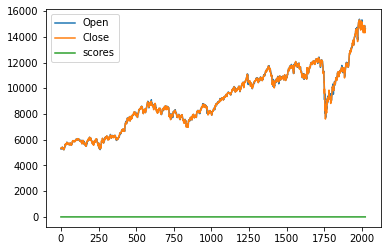

In [ ]:
df_for_training.plot.line()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
df_for_training_scaled

array([[-1.64605698, -1.62821087,  1.09601257],
       [-1.62462831, -1.62765097, -0.65037498],
       [-1.62331732, -1.6341338 , -1.9580037 ],
       ...,
       [ 2.25257699,  2.32102379, -0.19955484],
       [ 2.32028027,  2.35404158, -0.73178886],
       [ 2.35346528,  2.37140106, -0.45784906]])

In [ ]:
df_scaled_training = pd.DataFrame(df_for_training_scaled, columns = ['Open','Close','scores'])
df_scaled_training[:17]

,Open,Close,scores
0,-1.646057,-1.628211,1.096013
1,-1.624628,-1.627651,-0.650375
2,-1.623317,-1.634134,-1.958004
3,-1.640555,-1.635232,-1.469732
4,-1.637051,-1.623387,-0.001697
5,-1.625488,-1.609408,0.371224
6,-1.607133,-1.616903,0.772210
7,-1.614591,-1.615461,0.305427
8,-1.614548,-1.591898,0.606078
9,-1.602920,-1.595409,-0.555409


In [ ]:
trainX = []
trainY = []
n_future = 1   
n_past = 14 

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
trainX


[array([[-1.64605698e+00, -1.62821087e+00,  1.09601257e+00],
        [-1.62462831e+00, -1.62765097e+00, -6.50374977e-01],
        [-1.62331732e+00, -1.63413380e+00, -1.95800370e+00],
        [-1.64055462e+00, -1.63523236e+00, -1.46973172e+00],
        [-1.63705128e+00, -1.62338651e+00, -1.69723720e-03],
        [-1.62548804e+00, -1.60940832e+00,  3.71224189e-01],
        [-1.60713284e+00, -1.61690347e+00,  7.72210124e-01],
        [-1.61459099e+00, -1.61546060e+00,  3.05427433e-01],
        [-1.61454796e+00, -1.59189804e+00,  6.06078495e-01],
        [-1.60292028e+00, -1.59540867e+00, -5.55409181e-01],
        [-1.58985252e+00, -1.59433178e+00, -6.98615560e-02],
        [-1.60427430e+00, -1.60667296e+00, -7.56816609e-01],
        [-1.60631615e+00, -1.62237418e+00, -1.28548706e+00],
        [-1.62523008e+00, -1.64927512e+00, -5.78075352e-01]]),
 array([[-1.62462831e+00, -1.62765097e+00, -6.50374977e-01],
        [-1.62331732e+00, -1.63413380e+00, -1.95800370e+00],
        [-1.64055462e+

In [ ]:
trainY

[array([-1.6575772]),
 array([-1.64485324]),
 array([-1.65418133]),
 array([-1.6659381]),
 array([-1.66819487]),
 array([-1.67947875]),
 array([-1.64001729]),
 array([-1.61747115]),
 array([-1.62856151]),
 array([-1.5991804]),
 array([-1.58596214]),
 array([-1.54592053]),
 array([-1.50147284]),
 array([-1.51408933]),
 array([-1.54222368]),
 array([-1.52500779]),
 array([-1.47559506]),
 array([-1.48292433]),
 array([-1.49216637]),
 array([-1.48341863]),
 array([-1.47866874]),
 array([-1.47009291]),
 array([-1.46022749]),
 array([-1.44997545]),
 array([-1.42270062]),
 array([-1.44984637]),
 array([-1.46863142]),
 array([-1.48453632]),
 array([-1.48782472]),
 array([-1.48000115]),
 array([-1.4832037]),
 array([-1.46972749]),
 array([-1.48025911]),
 array([-1.48275243]),
 array([-1.47071629]),
 array([-1.48606224]),
 array([-1.46540746]),
 array([-1.47694929]),
 array([-1.48709387]),
 array([-1.49089819]),
 array([-1.51651801]),
 array([-1.51088678]),
 array([-1.47370371]),
 array([-1.4751

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1996, 14, 3).
trainY shape == (1996, 1).


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 64)            17408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
113/113 [==============================] - 4s 18ms/step - loss: 0.2495 - val_loss: 0.0607
Epoch 2/10
113/113 [==============================] - 1s 13ms/step - loss: 0.0317 - val_loss: 0.1200
Epoch 3/10
113/113 [==============================] - 1s 13ms/step - loss: 0.0266 - val_loss: 0.0285
Epoch 4/10
113/113 [==============================] - 1s 12ms/step - loss: 0.0224 - val_loss: 0.0679
Epoch 5/10
113/113 [==============================] - 1s 12ms/step - loss: 0.0211 - val_loss: 0.0862
Epoch 6/10
113/113 [==============================] - 1s 12ms/step - loss: 0.0192 - val_loss: 0.0947
Epoch 7/10
113/113 [==============================] - 1s 13ms/step - loss: 0.0190 - val_loss: 0.0711
Epoch 8/10
113/113 [==============================] - 1s 12ms/step - loss: 0.0180 - val_loss: 0.0347
Epoch 9/10
113/113 [==============================] - 1s 12ms/step - loss: 0.0172 - val_loss: 0.0069
Epoch 10/10
113/113 [==============================] - 1s 12ms/step - loss: 0.0190 - val_lo

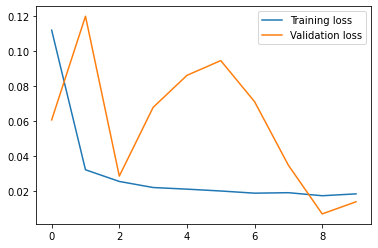

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:

n_future=90  
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()
forecast_past = model.predict(trainX)
forecast = model.predict(trainX[-n_future:]) #forecast 



In [ ]:
forecast_copies_past = np.repeat(forecast_past, df_for_training.shape[1], axis=-1)
y_pred_past = scaler.inverse_transform(forecast_copies_past)[:,0]
len(y_pred_past)

1996

In [ ]:
past_date = df['Date']


0       8/30/2012
1       8/31/2012
2        9/3/2012
3        9/4/2012
4        9/5/2012
          ...    
1991     4/9/2021
1992    4/12/2021
1993    4/13/2021
1994    4/15/2021
1995    4/16/2021
Name: Date, Length: 1996, dtype: object

In [ ]:
pre_past = pd.DataFrame(y_pred_past, columns = ['Open'])
past_date = df['Date']
Date = pd.to_datetime(past_date[14:].reset_index(drop=True))
pre_past['Date'] = Date
pre_past

,Open,Date
0,5422.829590,2012-08-30
1,5380.299805,2012-08-31
2,5347.881348,2012-09-03
3,5352.969727,2012-09-04
4,5341.250488,2012-09-05
...,...,...
1991,14932.074219,2021-04-09
1992,14965.040039,2021-04-12
1993,14652.083984,2021-04-13
1994,14506.083008,2021-04-15


In [ ]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]
y_pred_future

array([13354.809 , 13488.793 , 13540.21  , 13668.691 , 13753.788 ,
       13803.688 , 13860.921 , 13911.706 , 13976.246 , 13962.756 ,
       14066.911 , 14207.141 , 14170.323 , 13997.318 , 13980.148 ,
       13919.871 , 13893.631 , 14080.025 , 14066.23  , 14128.341 ,
       14330.11  , 14384.304 , 14397.698 , 14408.3955, 14448.753 ,
       14533.344 , 14603.31  , 14551.375 , 14714.442 , 14683.14  ,
       14700.774 , 14743.742 , 14622.986 , 14631.972 , 14561.905 ,
       14483.477 , 14330.241 , 14155.545 , 13769.287 , 13505.862 ,
       13573.996 , 14116.405 , 14429.91  , 14659.254 , 14977.751 ,
       15281.395 , 15503.243 , 15449.4   , 15535.985 , 15507.411 ,
       15560.931 , 15500.958 , 15288.725 , 14951.893 , 14792.353 ,
       14479.669 , 14256.215 , 13923.959 , 14238.506 , 13985.24  ,
       13946.091 , 14107.029 , 14489.294 , 14646.312 , 14730.99  ,
       14823.004 , 14898.237 , 15091.849 , 15140.12  , 15206.337 ,
       14862.215 , 14754.054 , 14607.172 , 14389.729 , 14313.3

In [ ]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
forecast_dates

[datetime.date(2021, 4, 16),
 datetime.date(2021, 4, 17),
 datetime.date(2021, 4, 18),
 datetime.date(2021, 4, 19),
 datetime.date(2021, 4, 20),
 datetime.date(2021, 4, 21),
 datetime.date(2021, 4, 22),
 datetime.date(2021, 4, 23),
 datetime.date(2021, 4, 24),
 datetime.date(2021, 4, 25),
 datetime.date(2021, 4, 26),
 datetime.date(2021, 4, 27),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 4, 29),
 datetime.date(2021, 4, 30),
 datetime.date(2021, 5, 1),
 datetime.date(2021, 5, 2),
 datetime.date(2021, 5, 3),
 datetime.date(2021, 5, 4),
 datetime.date(2021, 5, 5),
 datetime.date(2021, 5, 6),
 datetime.date(2021, 5, 7),
 datetime.date(2021, 5, 8),
 datetime.date(2021, 5, 9),
 datetime.date(2021, 5, 10),
 datetime.date(2021, 5, 11),
 datetime.date(2021, 5, 12),
 datetime.date(2021, 5, 13),
 datetime.date(2021, 5, 14),
 datetime.date(2021, 5, 15),
 datetime.date(2021, 5, 16),
 datetime.date(2021, 5, 17),
 datetime.date(2021, 5, 18),
 datetime.date(2021, 5, 19),
 datetime.date(2021, 5,

In [ ]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
df_forecast

,Date,Open
0,2021-04-16,13354.808594
1,2021-04-17,13488.792969
2,2021-04-18,13540.209961
3,2021-04-19,13668.691406
4,2021-04-20,13753.788086
...,...,...
85,2021-07-10,14932.074219
86,2021-07-11,14965.040039
87,2021-07-12,14652.083984
88,2021-07-13,14506.083008


In [ ]:



original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

original

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Open
1783,2020-05-04,9533.500000
1784,2020-05-05,9429.400391
1785,2020-05-06,9226.799805
1786,2020-05-07,9234.049805
1787,2020-05-08,9376.950195
...,...,...
2019,2021-04-09,14882.650390
2020,2021-04-12,14644.650390
2021,2021-04-13,14364.900390
2022,2021-04-15,14522.400390


In [ ]:
past = pre_past.loc[pre_past['Date'] >= '2020-5-1']

past

,Open,Date
1757,9574.150391,2020-05-04
1758,9607.811523,2020-05-05
1759,9585.688477,2020-05-06
1760,9520.466797,2020-05-07
1761,9520.161133,2020-05-08
...,...,...
1991,14932.074219,2021-04-09
1992,14965.040039,2021-04-12
1993,14652.083984,2021-04-13
1994,14506.083008,2021-04-15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


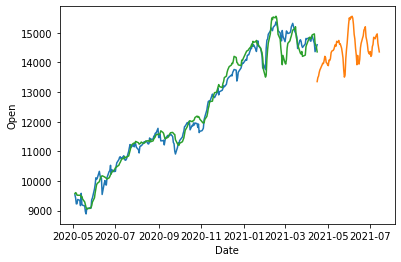

In [ ]:
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])
sns.lineplot(past['Date'], past['Open'])